In [1]:
################ Data Analysis & Calculation ##############3
import numpy as np 
import pandas as pd 

############ Data Visualization ##############
import matplotlib.pyplot as plt
%matplotlib inline

############### NLP & Search pattern ##################
import re  
import nltk 

############### Ignore Warning #############3
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Akshay\Downloads\rishisunakcomment.csv")

In [3]:
df.shape

(413, 1)

In [4]:
df.head()

,Comment
0,"""I give him a week."" \n""I give him 11 minutes...."
1,Watched his interview with Piers Morgan & he a...
2,He energizes and inspires even an American suc...
3,"Promising speech, but it doesn't take away fro..."
4,These are such trying times. Even for the coun...


In [5]:
data = pd.DataFrame(df.Comment)
data.head()

,Comment
0,"""I give him a week."" \n""I give him 11 minutes...."
1,Watched his interview with Piers Morgan & he a...
2,He energizes and inspires even an American suc...
3,"Promising speech, but it doesn't take away fro..."
4,These are such trying times. Even for the coun...


In [6]:
data.iloc[4,0]  # [ Row , Column]

'These are such trying times. Even for the country and for you Rishi Sanuk. You are guard of an empty treasure.\nWish you luck and hope you do well. ❤️'

In [7]:
data.text = data.Comment.str.lower()

In [8]:
data.iloc[1,0]

'Watched his interview with Piers Morgan & he actually came across as a really nice down to earth person!'

In [9]:
data.Comment= data.Comment.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[1,0]

'Watched his interview with Piers Morgan & he actually came across as a really nice down to earth person!'

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punctuation(abc):
    text_nopunt="".join([c  # c= delhi
                         for c in abc # c = Delhi 
                         if c not in string.punctuation])
    return text_nopunt

In [12]:
data.Comment = data.Comment.apply(lambda x : remove_punctuation(x)) # Text = x

In [13]:
data.Comment = data.Comment.str.replace('\d+','')

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('English')

In [16]:
data.Comment = data.Comment.apply(lambda x: ' '.join([c      # text = x
                                                      for c in x.split()  # c = delhi    
                                                      if c not in (stop)]))

In [17]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [18]:
Comment=data.Comment[3]
Comment

'Promising speech doesnt take away revolving door chaos Hope better predecessors says trust earned'

In [19]:
# Apply a second round of cleaning
def clean_text_round2(text):
    text =  re.sub('rishi|sunak|minister|uk|Rishi', '', text) #remove delhipolice
    text =  re.sub('india|prime|like| rishi','', text) #remove farmers
    text =  re.sub('time|people','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like S or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you word tokens 
                    if w.lower() in words)  # dictionary     
    return text

In [20]:
# Let's take a look at the updated text
data = pd.DataFrame(data.Comment.apply(lambda x: clean_text_round2(x)))
data.iloc[221,0]

'How increase credit decrease debit Poverty Government invest training job decrease birth rate Result Increase salary level increase income Informal Government show formal population Education Research Work together supply needs job economics growth increase export income Defense Space Unite research Government focus increase income Focus Agriculture Natural Safety cleaning Infrastructure'

In [21]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") ## v = verb   = arrest
            for w in w_tokenizer.tokenize(abc)]  # word tokenizer  w = arresting

In [23]:
data.Comment = data.Comment.apply(lambda x :' '.join(lemmatize_text(x)))  # text = x
data.iloc[221,0]

'How increase credit decrease debit Poverty Government invest train job decrease birth rate Result Increase salary level increase income Informal Government show formal population Education Research Work together supply need job economics growth increase export income Defense Space Unite research Government focus increase income Focus Agriculture Natural Safety clean Infrastructure'

In [24]:
data.Comment = data.Comment.str.rstrip()
data.iloc[221,0]

'How increase credit decrease debit Poverty Government invest train job decrease birth rate Result Increase salary level increase income Informal Government show formal population Education Research Work together supply need job economics growth increase export income Defense Space Unite research Government focus increase income Focus Agriculture Natural Safety clean Infrastructure'

In [25]:
data=data.drop_duplicates()
data.shape

(369, 1)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data.Comment)  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # document term matrix

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
aboard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abundantly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acceptance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yep,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,freq
aboard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abundantly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
accent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
acceptance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,360,361,362,363,364,365,366,367,368,freq
0,aboard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abundantly,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,accent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,accept,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,acceptance,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
347,good,41
493,luck,25
58,best,24
500,man,23
174,country,23
...,...,...
391,hong,1
392,hop,1
395,host,1
396,hot,1


In [30]:
text = " ".join(review for review in data.Comment)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 16468 words in the combination of all review.


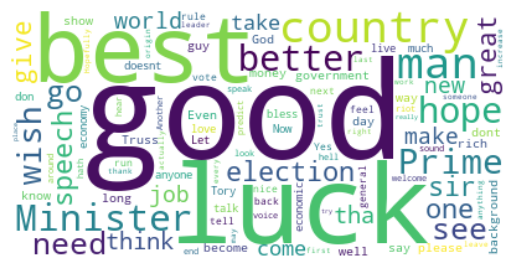

In [39]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
# Save the Word Cloud image
plt.savefig('wordcloud_Comment.png', bbox_inches='tight')
plt.show() # DISPLAY PLOT

# Sentiment Analysis

In [32]:
data

,Comment
0,give week give Seriously dont expect anyone la...
1,Watched interview Morgan actually come across ...
2,even But speak hope Best wish Prime Minister
3,Promising speech doesnt take away revolve door...
4,These try Even country San You guard empty tre...
...,...
408,Nice president
409,government electricity every night since wife ...
410,always need save Your job Now math save economy
411,Boo


In [33]:
data = data.drop_duplicates('Comment') 
data

,Comment
0,give week give Seriously dont expect anyone la...
1,Watched interview Morgan actually come across ...
2,even But speak hope Best wish Prime Minister
3,Promising speech doesnt take away revolve door...
4,These try Even country San You guard empty tre...
...,...
408,Nice president
409,government electricity every night since wife ...
410,always need save Your job Now math save economy
411,Boo


In [34]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity #afinn bing # polarity range -1 to +1
data['polarity'] = data['Comment'].apply(pol)
data.head(5)

,Comment,polarity
0,give week give Seriously dont expect anyone la...,-0.095833
1,Watched interview Morgan actually come across ...,0.300000
2,even But speak hope Best wish Prime Minister,1.000000
3,Promising speech doesnt take away revolve door...,0.350000
4,These try Even country San You guard empty tre...,-0.100000


In [35]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,Comment,polarity,Sentiment
0,give week give Seriously dont expect anyone la...,-0.095833,Negative
1,Watched interview Morgan actually come across ...,0.300000,Positive
2,even But speak hope Best wish Prime Minister,1.000000,Positive
3,Promising speech doesnt take away revolve door...,0.350000,Positive
4,These try Even country San You guard empty tre...,-0.100000,Negative


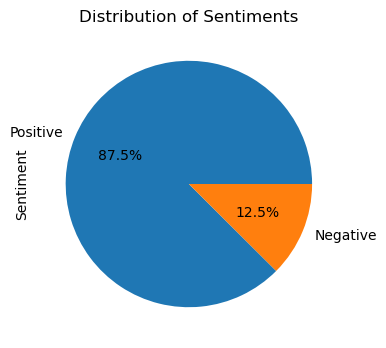

In [44]:
import matplotlib.pyplot as plt

sentiment_counts = data['Sentiment'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
sentiment_counts.plot.pie(autopct="%.1f%%")
plt.title('Distribution of Sentiments')

# Save the pie chart as an image
plt.savefig('sentiment_pie_chart.png')

# Display the pie chart
plt.show()
